# OvO : One vs One

In [151]:
from CLogDKPd import CLogDKPd_MGE, CLogDKPd_MGmB, CLogDKPd_MGE_Ordenado, sigmoid, sinal, grafico_Erro
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [152]:
# carregar dataset
(x_train_original, y_train_original), (x_test_original, y_test_original) = mnist.load_data()

x_train_array = x_train_original.reshape((len(x_train_original), 784))
x_test_array = x_test_original.reshape((len(x_test_original), 784))

x_train_array = x_train_array/255
x_test_array = x_test_array/255

# Normalizar os valores dentro da matriz de cada imagem
# (Sabendo que o valor máximo de cada pixel é 255)
x_train_array = x_train_array.astype('float32')
x_test_array = x_test_array.astype('float32')
print('X shape:', x_train_array.shape)

# Filtrar dataset apenas para digito de 0 a 4
train_filter_0 = np.where(y_train_original == 0)
test_filter_0 = np.where(y_test_original == 0)

train_filter_1 = np.where(y_train_original == 1)
test_filter_1 = np.where(y_test_original == 1)

train_filter_2 = np.where(y_train_original == 2)
test_filter_2 = np.where(y_test_original == 2)

train_filter_3 = np.where(y_train_original == 3)
test_filter_3 = np.where(y_test_original == 3)

x_train_0, y_train_0 = x_train_array[train_filter_0], y_train_original[train_filter_0]
x_test_0, y_test_0 = x_test_array[test_filter_0], y_test_original[test_filter_0]

x_train_1, y_train_1 = x_train_array[train_filter_1], y_train_original[train_filter_1]
x_test_1, y_test_1 = x_test_array[test_filter_1], y_test_original[test_filter_1]

x_train_2, y_train_2 = x_train_array[train_filter_2], y_train_original[train_filter_2]
x_test_2, y_test_2 = x_test_array[test_filter_2], y_test_original[test_filter_2]

x_train_3, y_train_3 = x_train_array[train_filter_3], y_train_original[train_filter_3]
x_test_3, y_test_3 = x_test_array[test_filter_3], y_test_original[test_filter_3]

X shape: (60000, 784)


In [153]:
# ficar só os 100 primeiros de cada classe
def select_first_n_per_class(x, y, n):
    x_selected = []
    y_selected = []
    
    for digit in np.unique(y):
        idx = np.where(y == digit)[0][:n]
        x_selected.append(x[idx])
        y_selected.append(y[idx])
    
    return np.concatenate(x_selected), np.concatenate(y_selected)

In [154]:
x_train_0, y_train_0 = select_first_n_per_class(x_train_0, y_train_0, n=30)
x_test_0, y_test_0 = select_first_n_per_class(x_test_0, y_test_0, n=15)

x_train_1, y_train_1 = select_first_n_per_class(x_train_1, y_train_1, n=30)
x_test_1, y_test_1 = select_first_n_per_class(x_test_1, y_test_1, n=15)

x_train_2, y_train_2 = select_first_n_per_class(x_train_2, y_train_2, n=30)
x_test_2, y_test_2 = select_first_n_per_class(x_test_2, y_test_2, n=15)

x_train_3, y_train_3 = select_first_n_per_class(x_train_3, y_train_3, n=30)
x_test_3, y_test_3 = select_first_n_per_class(x_test_3, y_test_3, n=15)

In [155]:
x_test = np.concatenate([x_test_0,x_test_1,x_test_2,x_test_3])
y_test = np.concatenate([y_test_0,y_test_1,y_test_2,y_test_3])

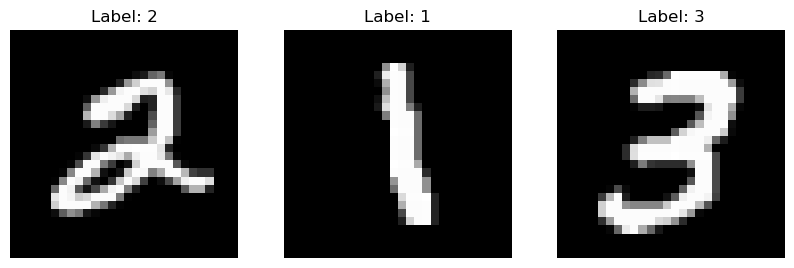

In [156]:
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for idx, i in enumerate([5, 6, 7]):
        plt.subplot(1, 3, idx + 1)  # Correcting the subplot setup to fit 3 images in 1 row
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

# Assuming x_train_original and y_train_original are defined
plot_images(x_train_original, y_train_original)

In [157]:
combinacoes = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]

In [158]:
# CLogDKPd_MGE -> 1
# CLogDKPd_MGmB -> 2
# CLogDKPd_MGE_Ordenado -> 3

alphas_MGE = []
alphas_MGmB = []
alphas_MGE_Orndenado = []

In [159]:
import numpy as np

def normalize_list(lst):
    np_lst = np.array(lst)
    normalized = (np_lst - np.min(np_lst)) / (np.max(np_lst) - np.min(np_lst))
    return normalized.tolist()

In [160]:
def ovo(num_metodo, batch_size=1):
    alphas = []
    erros = []
    
    eta = 0.5
    epochs = 500
    d=2

    batch_size = batch_size

    if num_metodo == 1: # CLogDKPd_MGE
        for comb in combinacoes:
            x_train = []
            y_train = []
            for i in comb:
                if i == 0:
                    x_train.append(x_train_0)
                    y_train.append(y_train_0)
                elif i == 1:
                    x_train.append(x_train_1)
                    y_train.append(y_train_1)
                elif i==2:
                    x_train.append(x_train_2)
                    y_train.append(y_train_2)
                elif i==3:
                    x_train.append(x_train_3)
                    y_train.append(y_train_3)
            x_train = np.concatenate(x_train)
            y_train = np.concatenate(y_train)
            d=2
            alpha = np.zeros(len(x_train))
            y_train = normalize_list(y_train)
            #print(y_train)
            alpha, E = CLogDKPd_MGE(x_train, y_train, alpha, eta, epochs, d)
            alphas.append(alpha)
            erros.append(E)

    elif num_metodo == 2: # CLogDKPd_MGmB        
        for comb in combinacoes:
            x_train = []
            y_train = []
            for i in comb:
                if i == 0:
                    x_train.append(x_train_0)
                    y_train.append(y_train_0)
                elif i == 1:
                    x_train.append(x_train_1)
                    y_train.append(y_train_1)
                elif i==2:
                    x_train.append(x_train_2)
                    y_train.append(y_train_2)
                elif i==3:
                    x_train.append(x_train_3)
                    y_train.append(y_train_3)
            x_train = np.concatenate(x_train)
            y_train = np.concatenate(y_train)
            alpha = np.zeros(len(x_train))
            y_train = normalize_list(y_train)
            alpha, E = CLogDKPd_MGmB(x_train, y_train, alpha, eta, epochs, d, batch_size)
            alphas.append(alpha)
            erros.append(E)

    elif num_metodo == 3: # CLogDKPd_MGE_Ordenado
        for comb in combinacoes:
            x_train = []
            y_train = []
            for i in comb:
                if i == 0:
                    x_train.append(x_train_0)
                    y_train.append(y_train_0)
                elif i == 1:
                    x_train.append(x_train_1)
                    y_train.append(y_train_1)
                elif i==2:
                    x_train.append(x_train_2)
                    y_train.append(y_train_2)
                elif i==3:
                    x_train.append(x_train_3)
                    y_train.append(y_train_3)
            x_train = np.concatenate(x_train)
            y_train = np.concatenate(y_train)

            alpha = np.zeros(len(x_train))
            y_train = normalize_list(y_train)
            alpha, E = CLogDKPd_MGE_Ordenado(x_train, y_train, alpha, eta, epochs, d)
            alphas.append(alpha)
            erros.append(E)

    else:
        raise ValueError("Método INVÁLIDO! Tente Novamente com um valor entre 1 e ....")

    return alphas, erros

In [161]:
alphas_MGE, erros_MGE = ovo(1)

c:\Users\User\Documents\A - Mestrado Matemática e Computação\2º semestre\Otimização em Machine Learning\Trabablo Prático\GitHub\OML-MMC\CLogDKPd.py:8: RuntimeWarning: overflow encountered in exp
  return format(1.0 / (1.0 + format(np.exp(-z), 'e')), 'e')
c:\Users\User\Documents\A - Mestrado Matemática e Computação\2º semestre\Otimização em Machine Learning\Trabablo Prático\GitHub\OML-MMC\CLogDKPd.py:24: RuntimeWarning: divide by zero encountered in log
  erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))
c:\Users\User\Documents\A - Mestrado Matemática e Computação\2º semestre\Otimização em Machine Learning\Trabablo Prático\GitHub\OML-MMC\CLogDKPd.py:24: RuntimeWarning: invalid value encountered in scalar multiply
  erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))


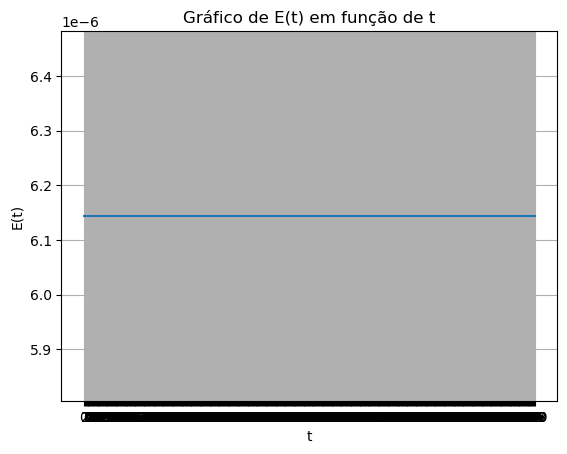

In [162]:
grafico_Erro(erros_MGE[3])

In [163]:
erros_MGE[3][0]

6.144212353328214e-06

In [164]:
A=np.dot(x_test,x_test.T)
d=2
A=A**d
predictions_MGE = []
for n in range(len(x_test)):
    score_imagem = np.zeros(4)
    i=0
    for [v1, v2] in combinacoes:
        alpha = alphas_MGE[i]
        score_temp = sum(alpha * (A[n]) )
        print(score_temp)
        #p_chapeu = sigmoid(sum(alpha * (A[n]) ))
        score_imagem[v1] = score_imagem[v1] + score_temp
        score_imagem[v2] = score_imagem[v2] - score_temp
        #score_imagem.append(score_temp)
        i = i+1
    num, score = max(enumerate(score_imagem), key=lambda x: x[1])
    #comp = combinacoes[num]
    #p_chapeu = sigmoid(score)
    #previsto = comp[sinal(p_chapeu)]
    predictions_MGE.append(num)

4764232.029365975
-80650564.28949046
-267952274.1633626
-244687560.27485788
-252852432.34932345
-341226992.461838
5183635.803328846
-832827.4473595358
-137439768.0602615
-141476127.1128755
-161915989.90038636
-292045423.321338
-7987364.338850917
-229846519.765953
-306545532.5530965
-198008105.70403904
-192607636.5458669
-374491545.28919023
12474157.749108158
-135603489.25725058
-449605246.8766087
-334719583.15092903
-374566601.3393907
-831571216.7298037
9662464.475097459
-66458887.62546332
-227435526.5248313
-218651476.9962675
-243203404.23308247
-247662488.03095913
1456053.8434980349
-84512834.84621714
-151464118.73952913
-157847749.52083397
-159761038.75113973
-159476638.33387864
-2469236.0207035006
-75234281.44752736
-146456942.00575277
-119164190.51870006
-126620429.16508374
-257732748.16359556
-1909254.081845263
-101877638.15313093
-293452463.7926549
-274826296.2564025
-300299692.5313691
-611016905.2094843
-8539170.363838566
-173026342.69466954
-236581237.77773005
-163488438.50499

In [165]:
predictions_MGE

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [166]:
alphas_MGmB, erros_MGmB = ovo(2, (2*len(x_train_3)))

[-37094.44140625 -40591.1875     -31518.01757812 -40278.640625
 -62986.609375   -53210.0546875  -53190.8515625  -13480.60351562
 -53148.6015625  -39635.6640625  -45837.0390625  -38157.625
 -50535.03515625 -17785.01367188 -50484.40625    -24663.81054688
 -53274.9921875  -51467.609375   -22939.984375   -44650.9609375
 -36424.33984375 -39139.25       -44109.484375   -11775.04589844
 -22528.99414062 -40433.15234375  -7662.29003906 -25502.3046875
 -11160.36425781 -34164.1015625    5163.07470703   4199.14501953
   2739.27612305   3296.63671875   4918.70214844  -3036.04638672
   4928.77832031   4720.91699219   5249.90332031   -662.98321533
   3580.69506836   5496.62939453   6795.70800781   4075.25683594
   3304.70629883   1948.01647949   6484.47412109   4305.32275391
   5963.53369141   2658.41186523   6616.33837891   -484.20779419
   4347.91894531   4069.16772461   7134.30957031   4039.17285156
   3762.39135742   4568.75585938   4659.19921875   6805.03515625]
[-28721.01367188 -28236.68652344 

KeyboardInterrupt: 

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=uint8)

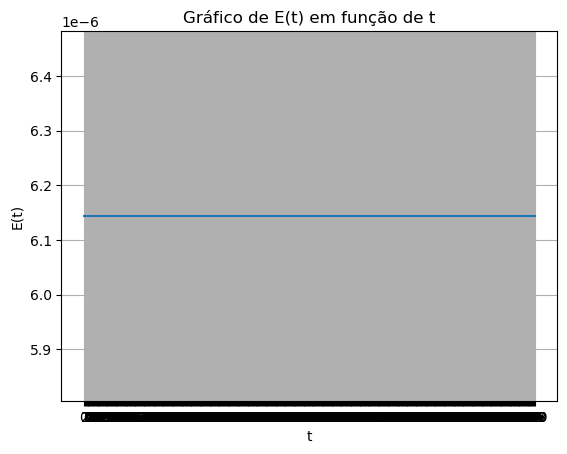

In [ ]:
grafico_Erro(erros_MGmB[0])

In [ ]:
alphas_MGE_Ordenado, erros_MGE_Ordenado = ovo(3)

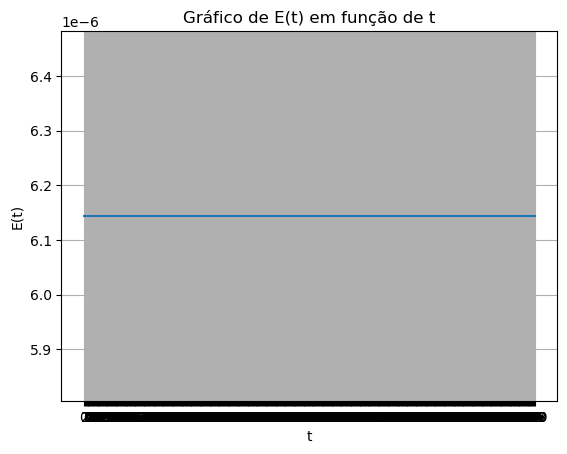

In [ ]:
grafico_Erro(erros_MGE_Ordenado[0])